Nama : Doni Arafat <br>
NIM : 211351049 <br>
Class : Malam B

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 3.82MB/s]


In [ ]:
!unzip  sleep-health-and-lifestyle-dataset.zip -d data
!ls data

Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: data/Sleep_health_and_lifestyle_dataset.csv  
Sleep_health_and_lifestyle_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
for column in df.columns:
  print(f"Unique values before changed in {column}: {df[column].unique()}")

Unique values before changed in Person ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].astype(str).str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')
df.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Occupation'] = df['Occupation'].factorize()[0]
df['BMI Category'] = df['BMI Category'].factorize()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].map({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

In [ ]:
for column in df.columns:
  print(f"Unique values after changed in {column}: {df[column].unique()}")

Unique values after changed in Person ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

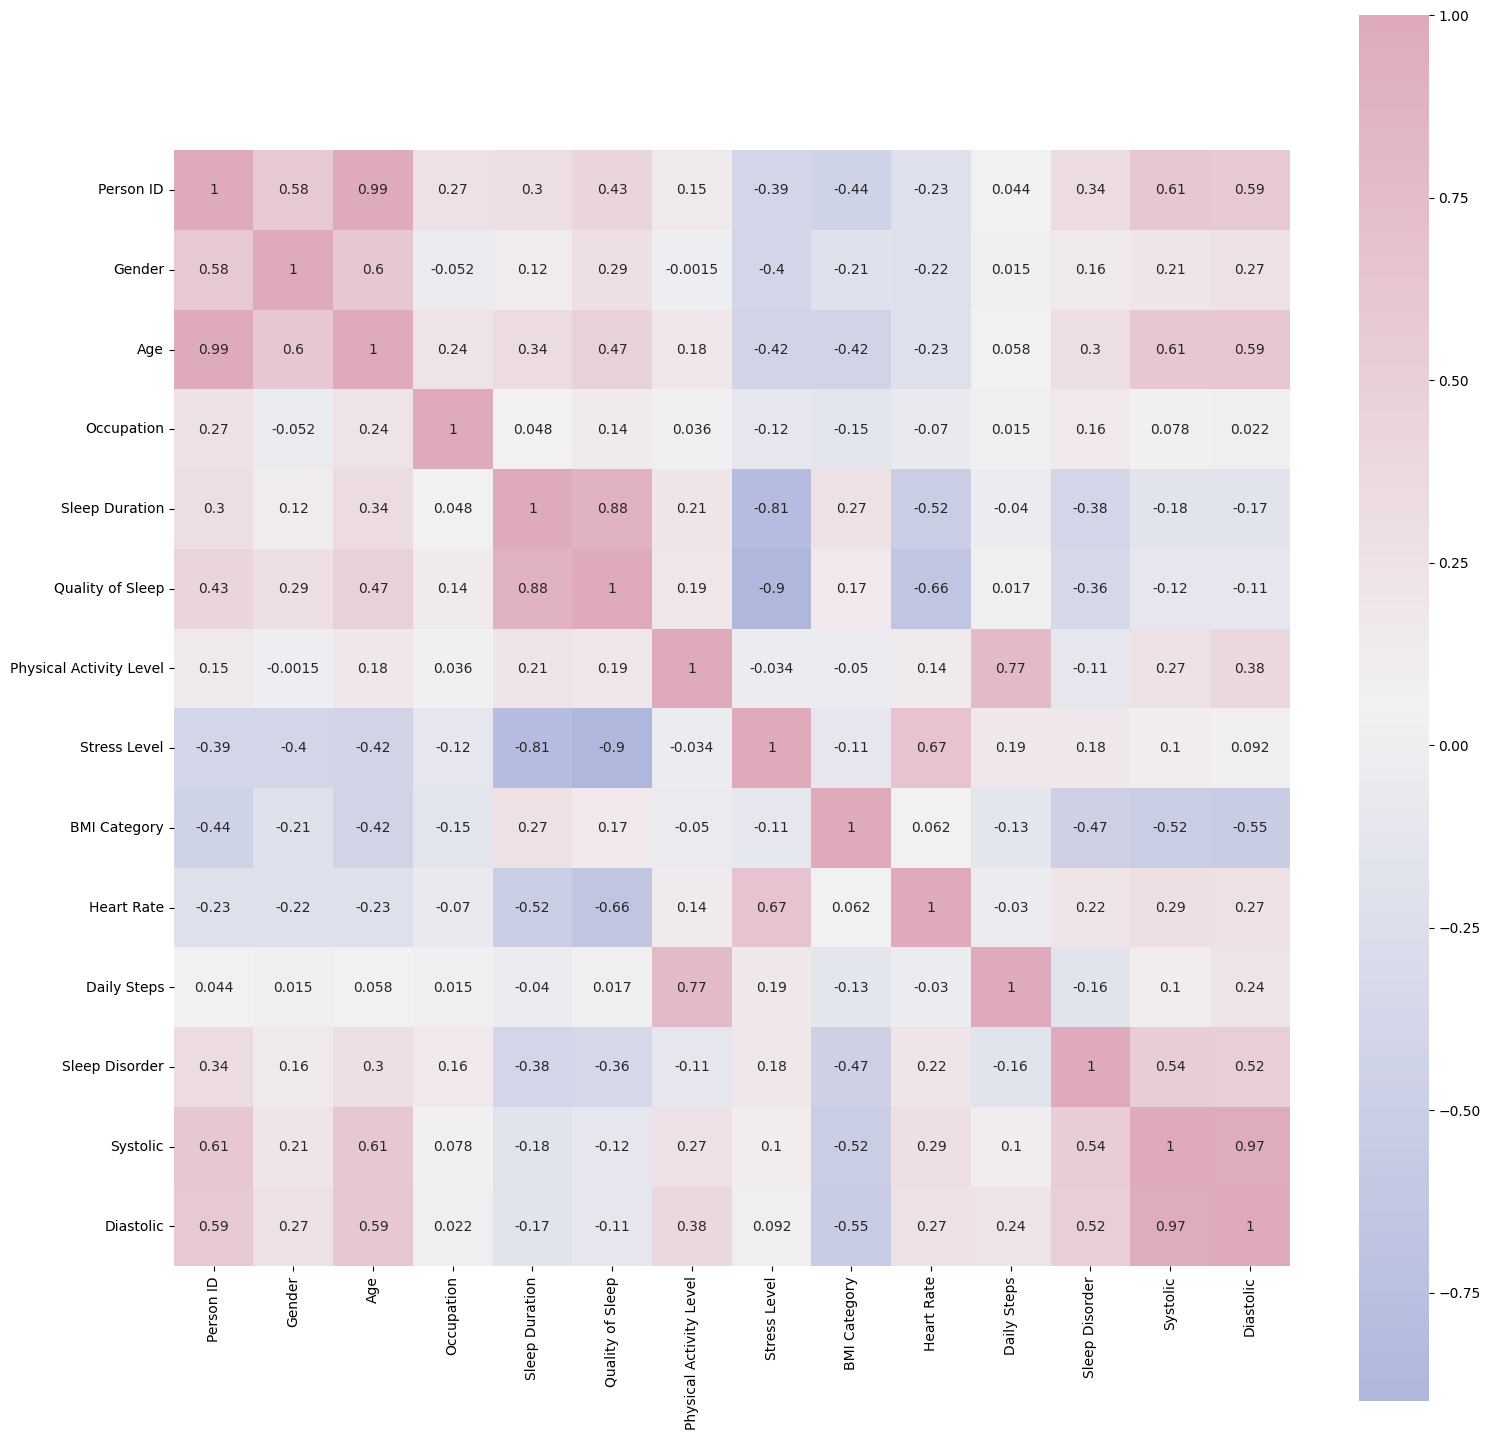

In [ ]:
cn = df.corr()

cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [ ]:
X = df.drop(['Sleep Disorder', 'Person ID', 'Daily Steps', 'Heart Rate'], axis=1)
y = df['Sleep Disorder'].astype(int)

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic,Diastolic
0,0,27,0,6.1,6,42,6,0,126,83
1,0,28,1,6.2,6,60,8,1,125,80
2,0,28,1,6.2,6,60,8,1,125,80
3,0,28,2,5.9,4,30,8,2,140,90
4,0,28,2,5.9,4,30,8,2,140,90
...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,0,140,95
370,1,59,4,8.0,9,75,3,0,140,95
371,1,59,4,8.1,9,75,3,0,140,95
372,1,59,4,8.1,9,75,3,0,140,95


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])



In [ ]:
# prompt: check the means and std for each feature

print(X_train.agg(np.mean).T)
print(X_train.agg(np.std).T)


Gender                       0.501672
Age                         42.297659
Occupation                   4.615385
Sleep Duration               7.127425
Quality of Sleep             7.311037
Physical Activity Level     59.565217
Stress Level                 5.391304
BMI Category                 0.729097
Systolic                   128.752508
Diastolic                   84.799331
dtype: float64
Gender                      0.500835
Age                         8.786527
Occupation                  2.529536
Sleep Duration              0.798982
Quality of Sleep            1.204123
Physical Activity Level    20.737532
Stress Level                1.792244
BMI Category                0.748728
Systolic                    7.810182
Diastolic                   6.221839
dtype: float64


In [ ]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[X.shape[1]]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

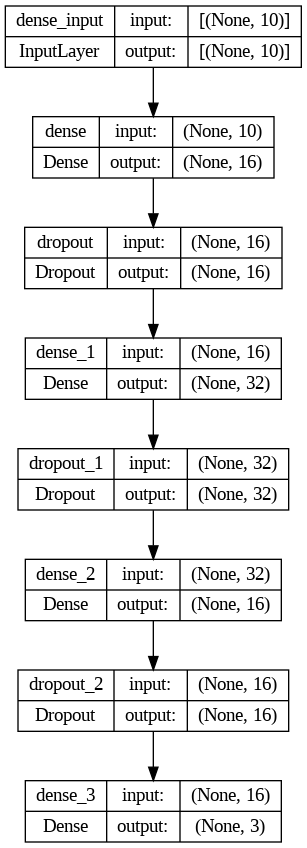

In [ ]:
# prompt: generate an image about the model using plot_model

tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
batch_size = 10
epochs = 100

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)


Epoch 1/100
24/24 [==============================] - 3s 25ms/step - loss: 1.2789 - accuracy: 0.3766 - val_loss: 1.0909 - val_accuracy: 0.3500
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 1.1728 - accuracy: 0.4268 - val_loss: 1.0040 - val_accuracy: 0.5667
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 1.1095 - accuracy: 0.4477 - val_loss: 0.9609 - val_accuracy: 0.7000
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 1.0892 - accuracy: 0.4770 - val_loss: 0.9245 - val_accuracy: 0.6833
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 1.0132 - accuracy: 0.5146 - val_loss: 0.8812 - val_accuracy: 0.6833
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.9749 - accuracy: 0.5481 - val_loss: 0.8368 - val_accuracy: 0.6833
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.9444 - accuracy: 0.5356 - val_loss: 0.8064 - val_accuracy: 0.6833
Epoch 8/100

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 90.67%


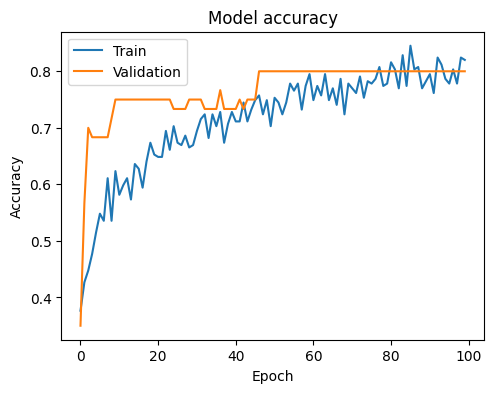

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


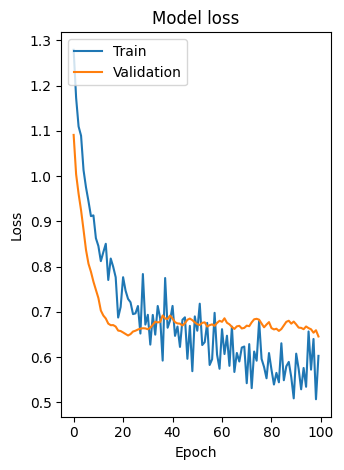

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,0,27,0,6.1,6,42,6,0,77,4200,0,126,83
1,2,0,28,1,6.2,6,60,8,1,75,10000,0,125,80
2,3,0,28,1,6.2,6,60,8,1,75,10000,0,125,80
3,4,0,28,2,5.9,4,30,8,2,85,3000,1,140,90
4,5,0,28,2,5.9,4,30,8,2,85,3000,1,140,90


In [ ]:
import pandas as pd
import numpy as np

# Data input untuk prediksi (contoh data, sesuaikan dengan fitur Anda)
# Format: [Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Heart Rate, Daily Steps, Systolic, Diastolic]
input_data = {
    'Gender': [0],  # Sesuaikan dengan nilai yang sesuai
    'Age': [50],
    'Occupation': [1],  # Sesuaikan dengan nilai yang sesuai
    'Sleep Duration': [5.9],
    'Quality of Sleep': [1],
    'Physical Activity Level': [20],
    'Stress Level': [10],
    'BMI Category': [1],
    'Systolic': [140],
    'Diastolic': [80]
}


# # Buat DataFrame dari data input
input_df = pd.DataFrame(input_data)

# # Memastikan data input diskalakan dengan preprocessor yang sama
input_data_scaled = scaler.transform(input_df)

# Melakukan prediksi
prediction = model.predict(input_data_scaled)
predicted_class = np.argmax(prediction, axis=1)


# Menampilkan hasil prediksi
class_labels = {0: 'None', 1: 'Sleep Apnea', 2: 'Insomnia'}
predicted_label = class_labels[predicted_class[0]]
print(f"Hasil Prediksi: {predicted_label}")
print("Prediction: ", prediction)
print("Predicted Class: ", predicted_class)


1/1 [==============================] - 0s 123ms/step
Hasil Prediksi: Insomnia
Prediction:  [[0.08281268 0.2365586  0.6806287 ]]
Predicted Class:  [2]


3/3 [==============================] - 0s 3ms/step


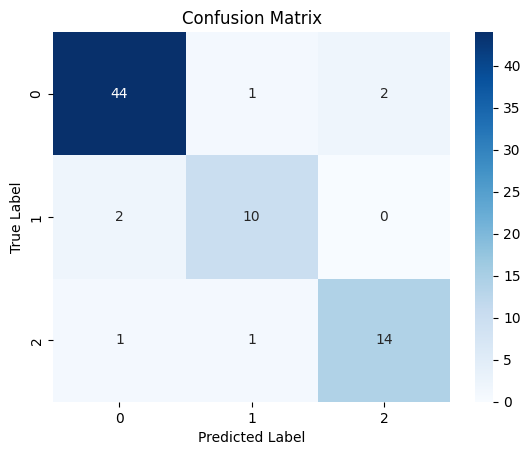

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save('./sleep-disorder.h5')
model = tf.keras.models.load_model('./sleep-disorder.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./sleep-disorder.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7696